This notebook has the code for the Machine Learning part of my Project. After the dataset has been transformed into a consistent format, the following code is executed.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/BMP/csvs/file1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/BMP/csvs/file2.csv')
df3 = pd.read_csv('/content/drive/MyDrive/BMP/csvs/file3.csv')
df4 = pd.read_csv('/content/drive/MyDrive/BMP/csvs/file4.csv')
df5 = pd.read_csv('/content/drive/MyDrive/BMP/csvs/file5.csv')
df6 = pd.read_csv('/content/drive/MyDrive/BMP/csvs/file6.csv')
df7 = pd.read_csv('/content/drive/MyDrive/BMP/csvs/file7.csv')
df8 = pd.read_csv('/content/drive/MyDrive/BMP/csvs/file8.csv')
df9 = pd.read_csv('/content/drive/MyDrive/BMP/csvs/file9.csv')

# combining all the different datasets into one dataframe
df_con = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9])

In [ ]:
print(df2)
print(df_con)

    slambx  slamby   time_taken  L1_cache  L2_cache  L3_cache  CPU
0      1.0     1.0   324.309910        32      1024     16500  2.4
1      1.0     1.1   356.142080        32      1024     16500  2.4
2      1.0     1.2   388.127075        32      1024     16500  2.4
3      1.0     1.3   420.092017        32      1024     16500  2.4
4      1.0     1.4   452.116702        32      1024     16500  2.4
..     ...     ...          ...       ...       ...       ...  ...
95     1.9     1.5   916.658041        32      1024     16500  2.4
96     1.9     1.6  1266.532201        32      1024     16500  2.4
97     1.9     1.7  1039.713131        32      1024     16500  2.4
98     1.9     1.8  1099.556768        32      1024     16500  2.4
99     1.9     1.9  1455.065423        32      1024     16500  2.4

[100 rows x 7 columns]
    slambx  slamby  time_taken  L1_cache  L2_cache  L3_cache  CPU
0      1.0     1.0  303.305053        32      1024     30250  2.1
1      1.0     1.1  332.975106        32

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from math import sqrt

## Linear Regression

In [ ]:
# function for evaluating metrics

def eval_metrics(y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)
  rmse = sqrt(mse)

  r2 = r2_score(y_test, y_pred)

  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

  print('The MAPE is:', np.mean(mape))
  print(f"The rmse is {rmse}")
  print(f"The r2_score is {r2}")

### Using all parameters (L1_cache, L2_cache, L3_cache, CPU)

In [ ]:
x = df_con[['slambx', 'slamby', 'L1_cache', 'L2_cache', 'L3_cache', 'CPU']]
y = df_con[['time_taken']]

# random_state=42 to get the same result in different executions
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# custom_parameters = [1.2, 1.3, 64, 512, 16384, 3.5]
# custom_parameters = [custom_parameters]
# predicted_runtime = model.predict(custom_parameters)

print(f"The predicted runtime for the custom parameters is {predicted_runtime[0]}")

eval_metrics(y_test, y_pred)

The MAPE is: 7.61360425084657
The rmse is 65.79450585485068
The r2_score is 0.9138384929265302


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


the below given code tests a completely new dataset (file6.csv) on the model trained on file1 to file5.

In [ ]:
# test_df = pd.read_csv('/content/drive/MyDrive/BMP/csvs/file6.csv')
# x_cust_test = test_df[['slambx', 'slamby', 'L1_cache', 'L2_cache', 'L3_cache', 'CPU']]
# y_cust_test = test_df[['time_taken']]

# y_cust_pred = model.predict(x_cust_test)

# eval_metrics(y_cust_test, y_cust_pred)

The MAPE is: 48.78458054274887
The rmse is 290.98526283787686
The r2_score is -2.4706731441470207


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### training without CPU parameter

In [ ]:
x1 = df_con[['slambx', 'slamby', 'L1_cache', 'L2_cache', 'L3_cache']]
y1 = df_con[['time_taken']]

#random_state=42 to get the same result in different executions
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(x1_train, y1_train)

y1_pred = model1.predict(x1_test)

eval_metrics(y1_test, y1_pred)

The MAPE is: 8.062587401189592
The rmse is 71.03087735832251
The r2_score is 0.899578111181773


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


rmse value is low when we remove CPU parameter than when we remove L3_cache parameter.

### Using only one machine's dataset for prediction

In [ ]:
x = df1[['slambx', 'slamby', 'L1_cache', 'L2_cache', 'L3_cache', 'CPU']]
y = df1[['time_taken']]

#random_state=42 to get the same result in different executions
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

eval_metrics(y_test, y_pred)

# print(y_pred)

The MAPE is: 5.582859273492454
The rmse is 32.35714731943092
The r2_score is 0.9561540687368625


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


The rmse value is quite low, indicating that for a single machine this dataset can quite accurately predict the runtime.

### Performing 5 fold cross validation

In [ ]:
x = df_con[['slambx', 'slamby', 'L1_cache', 'L2_cache', 'L3_cache', 'CPU']]
y = df_con[['time_taken']]

# Perform 5-fold cross-validation
scores = cross_val_score(model, x, y, cv=5)

# The scores are the R-squared scores for each fold
print(f"The R-squared scores for the 5 folds are {scores}")

# You can calculate the mean and standard deviation of the scores to get a summary of the model's performance
mean_score = scores.mean()
std_dev = scores.std()
print(f"The mean R-squared score is {mean_score}")
print(f"The standard deviation of the R-squared scores is {std_dev}")

The R-squared scores for the 5 folds are [-1.19274701 -1.62071171  0.84329597  0.56224776  0.18881296]
The mean R-squared score is -0.24382040646023437
The standard deviation of the R-squared scores is 0.9813287817208979


Performing on single machine's dataset

In [ ]:
x = df2[['slambx', 'slamby', 'L1_cache', 'L2_cache', 'L3_cache', 'CPU']]
y = df2[['time_taken']]

# Perform 5-fold cross-validation
scores = cross_val_score(model, x, y, cv=5)

# The scores are the R-squared scores for each fold
print(f"The R-squared scores for the 5 folds are {scores}")

# You can calculate the mean and standard deviation of the scores to get a summary of the model's performance
mean_score = scores.mean()
std_dev = scores.std()
print(f"The mean R-squared score is {mean_score}")
print(f"The standard deviation of the R-squared scores is {std_dev}")

The R-squared scores for the 5 folds are [0.21612892 0.88798974 0.94741609 0.90072579 0.56514298]
The mean R-squared score is 0.7034807023124023
The standard deviation of the R-squared scores is 0.2789633540245257


## Neural model with 2 layers

### 200 epochs

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

x = df_con[['slambx', 'slamby', 'L1_cache', 'L2_cache', 'L3_cache', 'CPU']]
y = df_con['time_taken']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the model
model_2_layers = Sequential([
    Dense(6, input_dim=6, activation='relu'),  # Layer 1
    Dense(6, activation='relu'),  # Layer 2
    Dense(1)  # Output layer
])

model_3_layers = Sequential([
    Dense(6, input_dim=6, activation='relu'),  # Layer 1
    Dense(12, activation='relu'),  # Layer 2
    Dense(6, activation='relu'),  # Layer 3
    Dense(1)  # Output layer
])

model_4_layers = Sequential([
    Dense(6, input_dim=6, activation='relu'),  # Layer 1
    Dense(12, activation='relu'),  # Layer 2
    Dense(12, activation='relu'),  # Layer 3
    Dense(6, activation='relu'),  # Layer 4
    Dense(1)  # Output layer
])

# Compile the models
model_2_layers.compile(loss='mean_squared_error', optimizer='adam')
model_3_layers.compile(loss='mean_squared_error', optimizer='adam')
model_4_layers.compile(loss='mean_squared_error', optimizer='adam')

# Fit the models to the data
model_2_layers.fit(x, y, epochs=200, batch_size=10)
model_3_layers.fit(x, y, epochs=200, batch_size=10)
model_4_layers.fit(x, y, epochs=200, batch_size=10)

print("For neural model with 2 layers:")
y_pred = model_2_layers.predict(x_test)
y_pred = y_pred.flatten()
eval_metrics(y_test, y_pred)

print("For neural model with 3 layers:")
y_pred = model_3_layers.predict(x_test).flatten()
eval_metrics(y_test, y_pred)

print("For neural model with 4 layers:")
y_pred = model_4_layers.predict(x_test).flatten()
eval_metrics(y_test, y_pred)


Epoch 1/200
90/90 [==============================] - 1s 3ms/step - loss: 79976904.0000
Epoch 2/200
90/90 [==============================] - 0s 3ms/step - loss: 28526924.0000
Epoch 3/200
90/90 [==============================] - 0s 3ms/step - loss: 8654588.0000
Epoch 4/200
90/90 [==============================] - 0s 3ms/step - loss: 1514577.2500
Epoch 5/200
90/90 [==============================] - 0s 3ms/step - loss: 211544.5938
Epoch 6/200
90/90 [==============================] - 0s 3ms/step - loss: 131149.8125
Epoch 7/200
90/90 [==============================] - 0s 3ms/step - loss: 128863.1875
Epoch 8/200
90/90 [==============================] - 0s 3ms/step - loss: 128807.2109
Epoch 9/200
90/90 [==============================] - 0s 3ms/step - loss: 128509.1406
Epoch 10/200
90/90 [==============================] - 0s 3ms/step - loss: 128298.3828
Epoch 11/200
90/90 [==============================] - 0s 3ms/step - loss: 128161.7188
Epoch 12/200
90/90 [==============================] - 0s 

### 300 epochs



In [ ]:
from keras.models import Sequential
from keras.layers import Dense

x = df_con[['slambx', 'slamby', 'L1_cache', 'L2_cache', 'L3_cache', 'CPU']]
y = df_con['time_taken']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the model
model_2_layers = Sequential([
    Dense(6, input_dim=6, activation='relu'),  # Layer 1
    Dense(6, activation='relu'),  # Layer 2
    Dense(1)  # Output layer
])

model_3_layers = Sequential([
    Dense(6, input_dim=6, activation='relu'),  # Layer 1
    Dense(12, activation='relu'),  # Layer 2
    Dense(6, activation='relu'),  # Layer 3
    Dense(1)  # Output layer
])

model_4_layers = Sequential([
    Dense(6, input_dim=6, activation='relu'),  # Layer 1
    Dense(12, activation='relu'),  # Layer 2
    Dense(12, activation='relu'),  # Layer 3
    Dense(6, activation='relu'),  # Layer 4
    Dense(1)  # Output layer
])

# Compile the models
model_2_layers.compile(loss='mean_squared_error', optimizer='adam')
model_3_layers.compile(loss='mean_squared_error', optimizer='adam')
model_4_layers.compile(loss='mean_squared_error', optimizer='adam')

# Fit the models to the data
model_2_layers.fit(x, y, epochs=300, batch_size=10)
model_3_layers.fit(x, y, epochs=300, batch_size=10)
model_4_layers.fit(x, y, epochs=300, batch_size=10)

print("For neural model with 2 layers:")
y_pred = model_2_layers.predict(x_test)
y_pred = y_pred.flatten()
eval_metrics(y_test, y_pred)

print("For neural model with 3 layers:")
y_pred = model_3_layers.predict(x_test).flatten()
eval_metrics(y_test, y_pred)

print("For neural model with 4 layers:")
y_pred = model_4_layers.predict(x_test).flatten()
eval_metrics(y_test, y_pred)


Epoch 1/300
90/90 [==============================] - 1s 2ms/step - loss: 374393.9688
Epoch 2/300
90/90 [==============================] - 0s 2ms/step - loss: 135488.4219
Epoch 3/300
90/90 [==============================] - 0s 2ms/step - loss: 131849.0156
Epoch 4/300
90/90 [==============================] - 0s 4ms/step - loss: 127736.9219
Epoch 5/300
90/90 [==============================] - 1s 8ms/step - loss: 130062.4297
Epoch 6/300
90/90 [==============================] - 0s 5ms/step - loss: 129461.1172
Epoch 7/300
90/90 [==============================] - 1s 10ms/step - loss: 127590.3906
Epoch 8/300
90/90 [==============================] - 1s 9ms/step - loss: 127398.4141
Epoch 9/300
90/90 [==============================] - 1s 12ms/step - loss: 127352.2344
Epoch 10/300
90/90 [==============================] - 1s 11ms/step - loss: 129855.3516
Epoch 11/300
90/90 [==============================] - 0s 5ms/step - loss: 128178.5859
Epoch 12/300
90/90 [==============================] - 0s 3ms

### 400 epochs

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

x = df_con[['slambx', 'slamby', 'L1_cache', 'L2_cache', 'L3_cache', 'CPU']]
y = df_con['time_taken']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the model
model_2_layers = Sequential([
    Dense(6, input_dim=6, activation='relu'),  # Layer 1
    Dense(6, activation='relu'),  # Layer 2
    Dense(1)  # Output layer
])

model_3_layers = Sequential([
    Dense(6, input_dim=6, activation='relu'),  # Layer 1
    Dense(12, activation='relu'),  # Layer 2
    Dense(6, activation='relu'),  # Layer 3
    Dense(1)  # Output layer
])

model_4_layers = Sequential([
    Dense(6, input_dim=6, activation='relu'),  # Layer 1
    Dense(12, activation='relu'),  # Layer 2
    Dense(12, activation='relu'),  # Layer 3
    Dense(6, activation='relu'),  # Layer 4
    Dense(1)  # Output layer
])

# Compile the models
model_2_layers.compile(loss='mean_squared_error', optimizer='adam')
model_3_layers.compile(loss='mean_squared_error', optimizer='adam')
model_4_layers.compile(loss='mean_squared_error', optimizer='adam')

# Fit the models to the data
model_2_layers.fit(x, y, epochs=400, batch_size=10)
model_3_layers.fit(x, y, epochs=400, batch_size=10)
model_4_layers.fit(x, y, epochs=400, batch_size=10)

print("For neural model with 2 layers:")
y_pred = model_2_layers.predict(x_test)
y_pred = y_pred.flatten()
eval_metrics(y_test, y_pred)

print("For neural model with 3 layers:")
y_pred = model_3_layers.predict(x_test).flatten()
eval_metrics(y_test, y_pred)

print("For neural model with 4 layers:")
y_pred = model_4_layers.predict(x_test).flatten()
eval_metrics(y_test, y_pred)


Epoch 1/400
90/90 [==============================] - 1s 2ms/step - loss: 652497.9375
Epoch 2/400
90/90 [==============================] - 0s 3ms/step - loss: 513524.8125
Epoch 3/400
90/90 [==============================] - 0s 3ms/step - loss: 513411.2500
Epoch 4/400
90/90 [==============================] - 0s 3ms/step - loss: 513295.1250
Epoch 5/400
90/90 [==============================] - 0s 3ms/step - loss: 513177.5938
Epoch 6/400
90/90 [==============================] - 0s 3ms/step - loss: 513059.3438
Epoch 7/400
90/90 [==============================] - 0s 3ms/step - loss: 512940.3750
Epoch 8/400
90/90 [==============================] - 0s 3ms/step - loss: 512821.3750
Epoch 9/400
90/90 [==============================] - 0s 3ms/step - loss: 512701.8438
Epoch 10/400
90/90 [==============================] - 0s 3ms/step - loss: 512582.1250
Epoch 11/400
90/90 [==============================] - 0s 3ms/step - loss: 512462.2812
Epoch 12/400
90/90 [==============================] - 0s 3ms/st

## Correlation Matrix

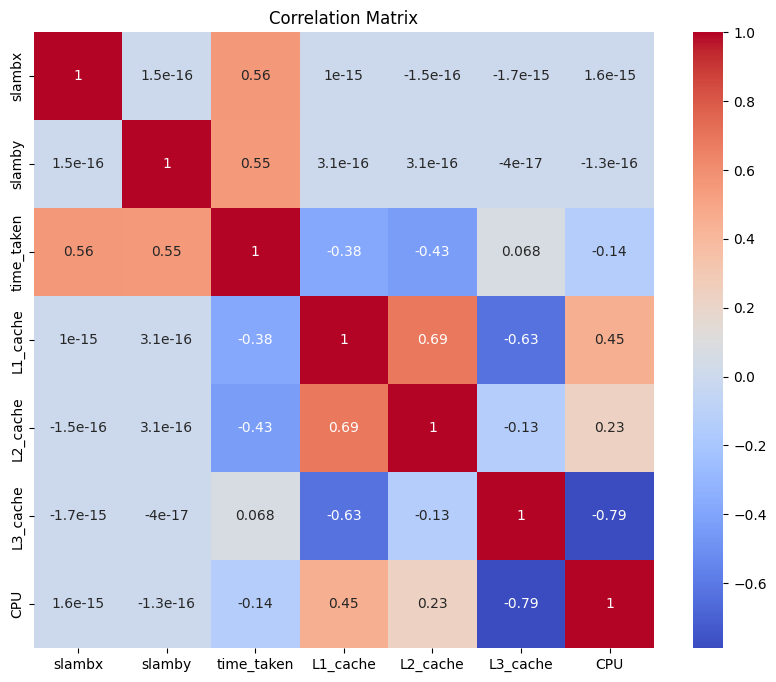

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'runtime' is your target column
correlation_matrix = df_con.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()